In [ ]:
import os
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
splits_root = r"E:\Skripsi\DEC\dataset\ae-supervised-dataset\splits"
train_csv = os.path.join(splits_root, "train_latent.csv")
test_csv  = os.path.join(splits_root, "test_latent.csv")

# -----------------------------
# Load data
# -----------------------------
train_df = pd.read_csv(train_csv)
test_df  = pd.read_csv(test_csv)

In [6]:
y_train = train_df["label"].values
y_test  = test_df["label"].values

X_train = train_df.drop(columns=["filename","label"]).values
X_test  = test_df.drop(columns=["filename","label"]).values

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc  = le.transform(y_test)

In [8]:
model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    tree_method="gpu_hist",   
    eval_metric="mlogloss"
)

model.fit(X_train, y_train_enc,
          eval_set=[(X_train, y_train_enc), (X_test, y_test_enc)],
          verbose=True)

[0]	validation_0-mlogloss:1.54715	validation_1-mlogloss:1.55665


e:\Skripsi\DEC\envTA\lib\site-packages\xgboost\training.py:183: UserWarning: [12:09:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)


[1]	validation_0-mlogloss:1.49106	validation_1-mlogloss:1.50854
[2]	validation_0-mlogloss:1.43732	validation_1-mlogloss:1.46523
[3]	validation_0-mlogloss:1.38832	validation_1-mlogloss:1.42666
[4]	validation_0-mlogloss:1.34304	validation_1-mlogloss:1.38912
[5]	validation_0-mlogloss:1.30066	validation_1-mlogloss:1.35519
[6]	validation_0-mlogloss:1.25954	validation_1-mlogloss:1.32479
[7]	validation_0-mlogloss:1.22104	validation_1-mlogloss:1.29555
[8]	validation_0-mlogloss:1.18494	validation_1-mlogloss:1.26811
[9]	validation_0-mlogloss:1.15082	validation_1-mlogloss:1.24219
[10]	validation_0-mlogloss:1.11867	validation_1-mlogloss:1.21728
[11]	validation_0-mlogloss:1.08811	validation_1-mlogloss:1.19363
[12]	validation_0-mlogloss:1.05776	validation_1-mlogloss:1.17134
[13]	validation_0-mlogloss:1.03126	validation_1-mlogloss:1.15109
[14]	validation_0-mlogloss:1.00511	validation_1-mlogloss:1.13149
[15]	validation_0-mlogloss:0.97946	validation_1-mlogloss:1.11379
[16]	validation_0-mlogloss:0.95477

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'mlogloss'


e:\Skripsi\DEC\envTA\lib\site-packages\xgboost\core.py:2676: UserWarning: [12:09:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
e:\Skripsi\DEC\envTA\lib\site-packages\xgboost\core.py:729: UserWarning: [12:09:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)
e:\Skripsi\DEC\envTA\lib\site


Classification Report:
              precision    recall  f1-score   support

    GASBURST       0.00      0.00      0.00        61
          MP       0.56      0.69      0.61       247
    ROCKFALL       0.93      0.96      0.94       421
         VTA       0.61      0.65      0.63       214
         VTB       0.00      0.00      0.00        23

    accuracy                           0.74       966
   macro avg       0.42      0.46      0.44       966
weighted avg       0.68      0.74      0.71       966



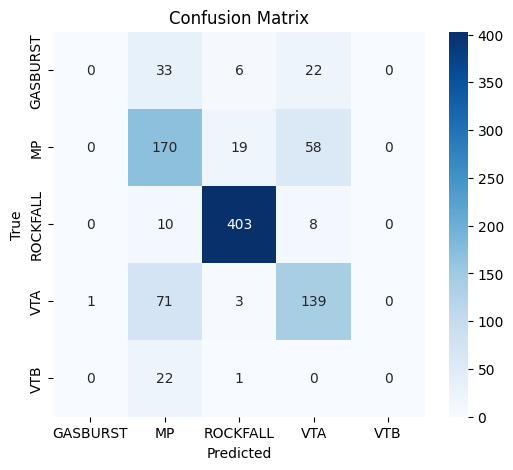

In [9]:
y_pred = model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test_enc, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test_enc, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=le.classes_,
            yticklabels=le.classes_,
            cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

Penyebab utama

Imbalanced dataset

Kelas minor (misalnya GASBURST) jumlahnya sangat kecil dibanding ROCKFALL atau MP.

XGBoost (seperti model ML lain) akan cenderung “mengabaikan” kelas minor karena tidak mengurangi loss secara signifikan.

Feature overlap

Latent space hasil autoencoder tidak memisahkan GASBURST dengan baik.

Bisa jadi sinyal GASBURST mirip dengan MP/VT, sehingga cluster-nya tidak jelas.

Overfitting pada kelas dominan

Model fokus ke kelas besar (misalnya ROCKFALL) karena jauh lebih sering muncul.

Akibatnya F1 untuk minor classes = 0.